In [52]:
entropy <- function(a, b, p, t_abs){
    
    f <- function(t, a, b, p, t_abs) {
        ifelse(t < t_abs, 0, p*a*exp(-a*(t-t_abs))+(1-p)*b*exp(-b*(t-t_abs)))}
    logf <- function(t, a, b, p, t_abs) ifelse( t > 500, 0, log(f(t, a, b, p, t_abs)))
    f1 <- function(t, a, b, p, t_abs) f(t, a, b, p, t_abs)*logf(t, a, b, p, t_abs)
    h <- function(a, b, p, t_abs) -integrate(f1, t_abs, Inf, a=a, b=b, p=p, t_abs=t_abs)$value
return(h(a, b, p, t_abs))
    
}


In [53]:
entropyR <- function(a, b, p, t_abs){

     f <- function(t, a, b, p, t_abs) {
        ifelse(t < t_abs, 0, p*a*exp(-a*(t-t_abs))+(1-p)*b*exp(-b*(t-t_abs)))}
    fR <-function(t, a, b, p, t_abs) ((a*b)/(p*b+(1-p)*a))*(1/t^{3})*f(1/t, a, b, p, t_abs)
    logfR <- function(t, a, b, p, t_abs) ifelse((1/t) > 500, 0, -log(m)-3*log(t)+log(f(1/t, a, b, p, t_abs)))
    FR <- function(t, a, b, p, t_abs) fR(t, a, b, p, t_abs)*logfR(t, a, b, p, t_abs)
    H <- function(a, b, p, t_abs) -(integrate(FR, 0, 1/t_abs, a=a, b=b, p=p, t_abs=t_abs)$value)
    return(H(a, b, p, t_abs))
}

In [54]:
SetNo. <- seq(1, 25, 1)

In [55]:
t_abs <- c(2.500, 1.5300, 1.8900, 1.3500, 2.500, 2.1600, 2.2500, 2.5000, 1.9800, 2.5000 , 2.4376 , 2.5000 , 1.3997, 1.0870, 2.5000 , 2.5000, 2.0079 , 0.7790 , 2.5000 , 2.5000 , 2.5000 , 2.3788, 0.7300 , 2.0859, 2.4239, 1.9113 )

In [56]:
a <- c(1/86.5052, 1/21.2770, 1/63.4518, 1/16.6083, 1/36.1141, 1/16.8848 , 1/52.9073 , 1/86.0585 , 1/68.7569, 1/98.8533, 1/8.1773 , 1/81.5461, 1/74.2776, 1/82.0749, 1/95.0209 , 1/104.2992, 1/55.3741 , 1/88.3080 , 1/54.0979, 1/82.9394 , 1/65.1806 , 1/10.6168, 1/63.5526 , 1/56.1703 , 1/74.8167, 1/50.3195)

In [57]:
b <- c(1/167.2800, 1/86.3707, 1/114.8000, 1/85.2152, 1/239.4464, 1/75.5116, 1/55.9003, 1/340.5995, 1/68.7616, 1/98.8533 , 1/59.1891, 1/369.4809, 1/961.3536 , 1/237.3042, 1/4016.8709, 1/295.7705 , 1/55.3741, 1/446.1895, 1/157.5274, 1/315.8859, 1/65.3424 , 1/51.1876 , 1/217.9029 , 1/57.0679, 1/1758.7056, 1/228.3939 )

In [58]:
p <- c(0.7192 , 0.0101, 0.9775, 0.6159, 0.5311, 0.3576 , 1.0000, 0.8349, 0.0277 , 0.1244 , 0.1087, 0.8663, 0.9615 , 0.9531 , 0.9851 , 0.8355 , 0.1045, 0.9811 , 0.8419 , 0.9233 , 0.9826 , 0.2919 , 0.7291 , 0.9745 , 0.9892, 0.5347 )

In [59]:
Cv <- c()
Ch <- c()
for (i in 1:length(SetNo.)){
    h <- entropy(a[i], b[i], p[i], t_abs[i])
    m <- (p[i]*b[i]+(1-p[i])*a[i])/(a[i]*b[i])
    Ch_ <- (1/m)*exp(h-1)
    Ch <- c(Ch, Ch_)
    Cv_<- sqrt(((2*p[i]*(b[i])^(2)+2*(1-p[i])*(a[i])^(2))/(p[i]*b[i]+(1-p[i])*a[i])^(2))-1)
    Cv <- c(Cv, Cv_)
}


In [60]:
ChR <- c()
for (i in 1:length(SetNo.)){
    H <- entropyR(a[i], b[i], p[i], t_abs[i])
    ChR_ <- (1/m)*(exp(H-1))
    ChR <- c(ChR, ChR_)
}


In [61]:
df <- data.frame( Dataset=SetNo., ISI= Ch, IR= ChR)

In [62]:
library(ggplot2)
theme_set(
  theme_bw() +
    theme(legend.position = "right")
  )

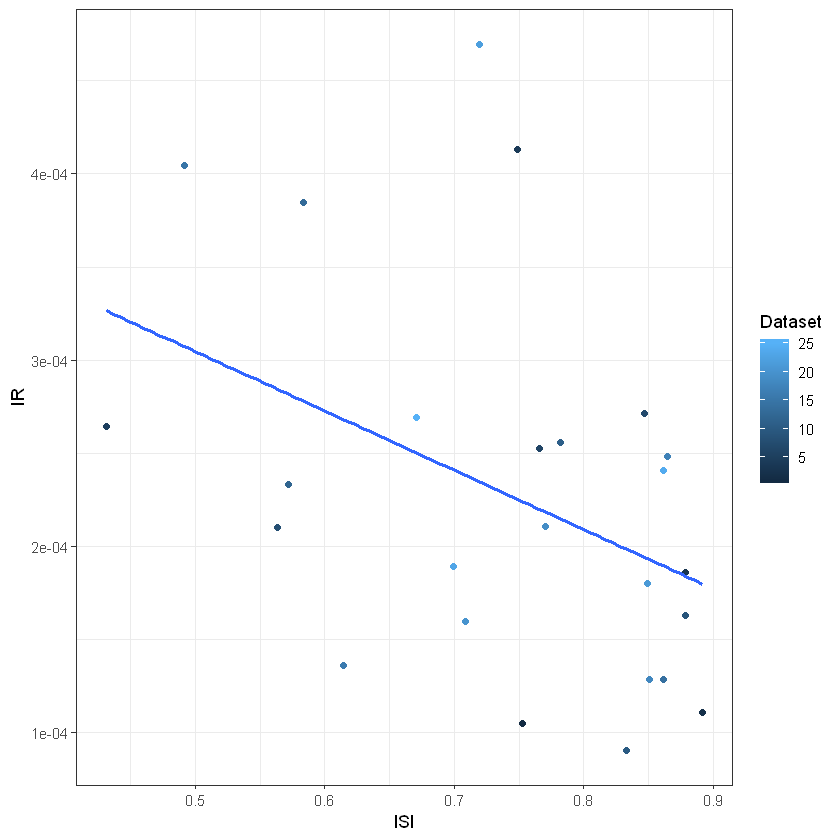

In [51]:
b <- ggplot(df, aes(x = ISI, y = IR))
b + geom_point(aes(color=Dataset)) + geom_smooth(method="lm", se=FALSE, fullrange=FALSE)

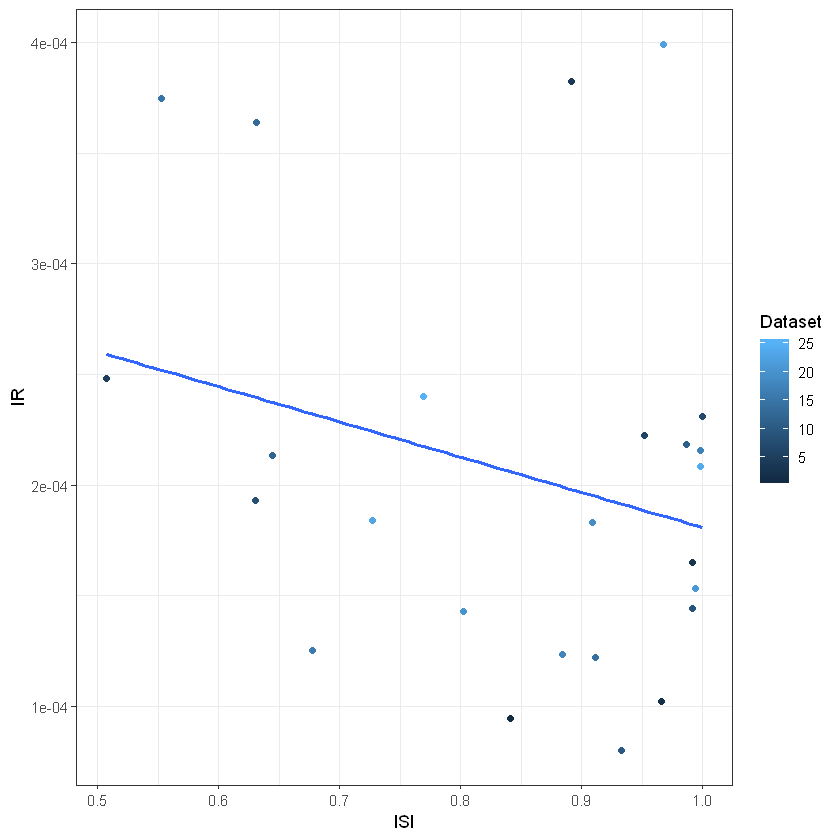

In [63]:
b <- ggplot(df, aes(x = ISI, y = IR))
b + geom_point(aes(color=Dataset)) + geom_smooth(method="lm", se=FALSE, fullrange=FALSE)